In [1]:
import hmftpy as hmf
from hmftpy.plaquettes.triangular import plaq12, plaq12z, plaq9p, plaq9d, plaq3
from hmftpy.operators import mf_ops, inner_hamiltonian, periodic_hamiltonian
from hmftpy import do_hmft
from hmftpy.plot_spins import draw_tri_lattice, draw_cluster, plot_spins
from quspin.basis import spin_basis_1d
from quspin.operators import quantum_operator
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

plaq = plaq12
L = plaq['L']
# basis = spin_basis_1d(L, pauli=0, Nup=(5, 6, 7))
basis = spin_basis_1d(L, pauli=0)


ops = hmf.operators.mf_ops(plaq, basis)
maxit = 50

In [2]:
urts = [[4,0,1],
        [5,1,2],
        [7,3,4],
        [8,4,5],
        [9,5,6],
        [10,7,8],
        [11,8,9]]

dwts = [[0,3,4],
        [1,4,5],
        [2,5,6],
        [4,7,8],
        [5,8,9],
        [8,10,11]]

def scalar_chirality(sites, basis):
    # a.(bxc)
    a, b, c = sites
    op_lst = [['xyz', [[1, a, b, c]]], 
              ['xzy', [[-1, a, b, c]]],
              ['yzx', [[1, a, b, c]]], 
              ['yxz', [[-1, a, b, c]]],
              ['zxy', [[1, a, b, c]]], 
              ['zyx', [[-1, a, b, c]]],
             ]
    return quantum_operator({'static': op_lst}, basis=basis, check_symm=False, check_herm=False)

def z_helicity(sites, basis):
    # (a x b + b x c + c x a)_z
    a, b, c = sites
    op_lst = [['xy', [[1, a, b], [1, b, c], [1, c, a]]], 
              ['yx', [[-1, a, b], [-1, b, c], [-1, c, a]]]
             ]
    return quantum_operator({'static': op_lst}, basis=basis, check_symm=False, check_herm=False)


urt_ops = [scalar_chirality(sites, basis) for sites in urts]
dwt_ops = [scalar_chirality(sites, basis) for sites in dwts]

urt_hel = [z_helicity(sites, basis) for sites in urts]
dwt_hel = [z_helicity(sites, basis) for sites in dwts]


def get_chis(v):
    urt_chis = np.zeros(7)
    dwt_chis = np.zeros(6)
    for i in range(7):
        urt_chis[i] = np.real(urt_ops[i].expt_value(v))
        if i != 6:
            dwt_chis[i] = np.real(dwt_ops[i].expt_value(v))
    return urt_chis, dwt_chis

def get_hels(v):
    urt_hels = np.zeros(7)
    dwt_hels = np.zeros(6)
    for i in range(7):
        urt_hels[i] = np.real(urt_hel[i].expt_value(v))
        if i != 6:
            dwt_hels[i] = np.real(dwt_hel[i].expt_value(v))
    return urt_hels, dwt_hels

# Low $J_2$ phase

In [3]:
interactions = {'local': {},
                'nearest': {'xx': 1, 'yy': 1, 'zz': 0},
                'n_nearest': {'xx': .01, 'yy': .01, 'zz': 0}}
e, v, mf, cvg = do_hmft(plaq, interactions, basis, 
                        max_iter=maxit, mf0=None, 
                        ops=ops, hmft_tol=10**-8,
                        lanczos_tol=10**-11,
                        mf_cvg=False, every_other=True)
print('Energy: {}'.format(e))
print('Converged? {}'.format(cvg))

urt_mid, dwt_mid = get_chis(v)
print('Upright triangle chiralities')
print(urt_mid)
print('Downward triangle chiralities')
print(dwt_mid)

urt_h, dwt_h = get_hels(v)
print('Upright triangle helicities')
print(urt_h)
print('Downard triangle helicities')
print(dwt_h)

Energy: -4.357977949869616
Converged? True
Upright triangle chiralities
[-3.22124272e-13  9.01664160e-13 -1.23437024e-12  1.22806279e-13
  3.40071721e-12 -1.14638702e-12 -2.39164851e-12]
Downward triangle chiralities
[ 1.22880872e-13  1.18156526e-12 -9.86518159e-13 -4.27397267e-12
  2.20181425e-12 -2.01774014e-12]
Upright triangle helicities
[0.4338898  0.43343034 0.52348714 0.57506423 0.52296202 0.56128188
 0.56116023]
Downard triangle helicities
[0.43389913 0.51660358 0.43327864 0.56761041 0.5674385  0.55547939]


# Disordered phase

In [4]:
interactions = {'local': {},
                'nearest': {'xx': 1, 'yy': 1, 'zz': 0},
                'n_nearest': {'xx': .18, 'yy': .18, 'zz': 0}}
e, v, mf, cvg = do_hmft(plaq, interactions, basis, 
                        max_iter=maxit, mf0=None, 
                        ops=ops, hmft_tol=10**-8,
                        lanczos_tol=10**-11,
                        mf_cvg=False, every_other=True)
print('Energy: {}'.format(e))
print('Converged? {}'.format(cvg))

urt_mid, dwt_mid = get_chis(v)
print('Upright triangle chiralities')
print(urt_mid)
print('Downward triangle chiralities')
print(dwt_mid)

urt_h, dwt_h = get_hels(v)
print('Upright triangle helicities')
print(urt_h)
print('Downard triangle helicities')
print(dwt_h)

Energy: -3.74818888522183
Converged? True
Upright triangle chiralities
[ 8.40243673e-14 -1.83207833e-13 -9.79596869e-14  4.44332863e-14
 -9.38510153e-14 -2.53097296e-13  1.84705224e-13]
Downward triangle chiralities
[ 2.68301006e-13  3.29770933e-15 -1.10217726e-13  1.39955369e-13
 -6.72328106e-14  1.05355937e-13]
Upright triangle helicities
[-6.16752309e-13  3.17671237e-14 -9.03599567e-13 -6.07269303e-13
 -1.46242660e-13 -7.02720882e-13 -1.00469980e-13]
Downard triangle helicities
[-8.22307500e-13 -4.88365858e-13  2.94093026e-13 -7.75224159e-13
 -2.83233178e-13 -3.94187287e-13]


# Stripy phase

In [5]:
interactions = {'local': {},
                'nearest': {'xx': 1, 'yy': 1, 'zz': 0},
                'n_nearest': {'xx': .31, 'yy': .31, 'zz': 0}}
e, v, mf, cvg = do_hmft(plaq, interactions, basis, 
                        max_iter=maxit, mf0=None, 
                        ops=ops, hmft_tol=10**-8,
                        lanczos_tol=10**-11,
                        mf_cvg=False, every_other=True)
print('Energy: {}'.format(e))
print('Converged? {}'.format(cvg))

urt_mid, dwt_mid = get_chis(v)
print('Upright triangle chiralities')
print(urt_mid)
print('Downward triangle chiralities')
print(dwt_mid)

urt_h, dwt_h = get_hels(v)
print('Upright triangle helicities')
print(urt_h)
print('Downard triangle helicities')
print(dwt_h)

Energy: -4.25068211015355
Converged? True
Upright triangle chiralities
[ 7.13804016e-14  7.93294467e-14  9.12867511e-14 -3.68673291e-14
  1.15062824e-13 -1.07482905e-13  1.69967122e-14]
Downward triangle chiralities
[-1.86811287e-13 -9.76578844e-15 -8.96598754e-14  3.61952854e-14
 -4.79401780e-14  4.80198563e-14]
Upright triangle helicities
[-2.83260318e-06 -4.20666460e-07 -3.73608052e-06  2.14555997e-06
 -1.66174533e-06  1.01146446e-06 -3.24171986e-06]
Downard triangle helicities
[-3.18179014e-06 -4.73947641e-07 -4.02643153e-06  2.17973217e-06
 -1.71715559e-06 -3.59841148e-06]


In [6]:
sum_h = np.zeros(10)
es = np.zeros(10)
J2s = np.linspace(0, .4, 10)
mf0 = None
for i, J2 in enumerate(J2s):
    interactions = {'local': {},
                    'nearest': {'xx': 1, 'yy': 1, 'zz': 0},
                    'n_nearest': {'xx': J2, 'yy': J2, 'zz': 0}}
    e, v, mf0, cvg = do_hmft(plaq, interactions, basis, 
                            max_iter=maxit,
                            ops=ops, hmft_tol=10**-8,
                            lanczos_tol=10**-11,
                            mf0=None,
                            mf_cvg=False, every_other=True)
    urt_h, dwt_h = get_hels(v)
    sum_h[i] = np.sum(urt_h)
    es[i] = e

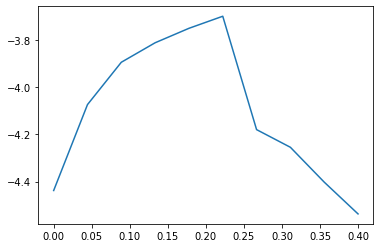

In [7]:
plt.plot(J2s, es)

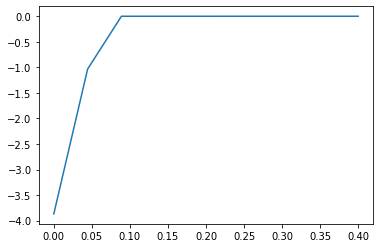

In [8]:
plt.plot(J2s, sum_h)